In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Ganti "path/to/your/file" dengan path yang benar dari file Anda
file_path = '/content/drive/MyDrive/Dataset/RegresiUTSTelkom.csv'
data = pd.read_csv(file_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [ ]:
# Mengganti nama kolom agar lebih mudah dipanggil
data.columns = [f"col_{i}" for i in range(data.shape[1])]

# Memeriksa informasi dataset setelah mengganti nama kolom
data.info()

# Menangani missing values (jika ada)
data = data.dropna()  # atau gunakan fillna sesuai kebutuhan

# Normalisasi kolom-kolom numerik menggunakan MinMaxScaler
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

# Menampilkan 5 data pertama setelah preprocessing
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   col_0   515344 non-null  int64  
 1   col_1   515344 non-null  float64
 2   col_2   515344 non-null  float64
 3   col_3   515344 non-null  float64
 4   col_4   515344 non-null  float64
 5   col_5   515344 non-null  float64
 6   col_6   515344 non-null  float64
 7   col_7   515344 non-null  float64
 8   col_8   515344 non-null  float64
 9   col_9   515344 non-null  float64
 10  col_10  515344 non-null  float64
 11  col_11  515344 non-null  float64
 12  col_12  515344 non-null  float64
 13  col_13  515344 non-null  float64
 14  col_14  515344 non-null  float64
 15  col_15  515344 non-null  float64
 16  col_16  515344 non-null  float64
 17  col_17  515344 non-null  float64
 18  col_18  515344 non-null  float64
 19  col_19  515344 non-null  float64
 20  col_20  515344 non-null  float64
 21  col_21  51

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90
0,0.88764,0.780177,0.492987,0.595220,0.341113,0.386532,0.229635,0.546232,0.359274,0.532466,...,0.346752,0.494001,0.367177,0.650031,0.550999,0.459186,0.613745,0.354687,0.506122,0.385477
1,0.88764,0.817124,0.511606,0.571964,0.342073,0.394968,0.254988,0.512831,0.352096,0.522585,...,0.344695,0.499157,0.350453,0.643421,0.567316,0.470228,0.587814,0.337376,0.504859,0.359438
2,0.88764,0.772129,0.464800,0.540674,0.319971,0.411973,0.224074,0.535929,0.311991,0.476686,...,0.369357,0.476865,0.357216,0.631499,0.546663,0.475993,0.593813,0.351622,0.515629,0.377862
3,0.88764,0.817341,0.525963,0.590047,0.331972,0.374082,0.261984,0.487309,0.316833,0.509999,...,0.350082,0.489912,0.373525,0.637490,0.564964,0.462806,0.611127,0.348736,0.505936,0.387203
4,0.88764,0.810325,0.467870,0.630523,0.360381,0.352313,0.252972,0.579251,0.337797,0.477000,...,0.347479,0.490505,0.365778,0.645078,0.566881,0.464796,0.608809,0.344612,0.501445,0.360085


In [ ]:
# Ringkasan statistik dasar
data.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,0.858394,0.691420,0.469220,0.496369,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,0.122821,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.808989,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,0.898876,0.705890,0.479105,0.499284,0.313357,0.396254,0.284666,0.516247,0.355178,0.477685,...,0.349492,0.490236,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,0.943820,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


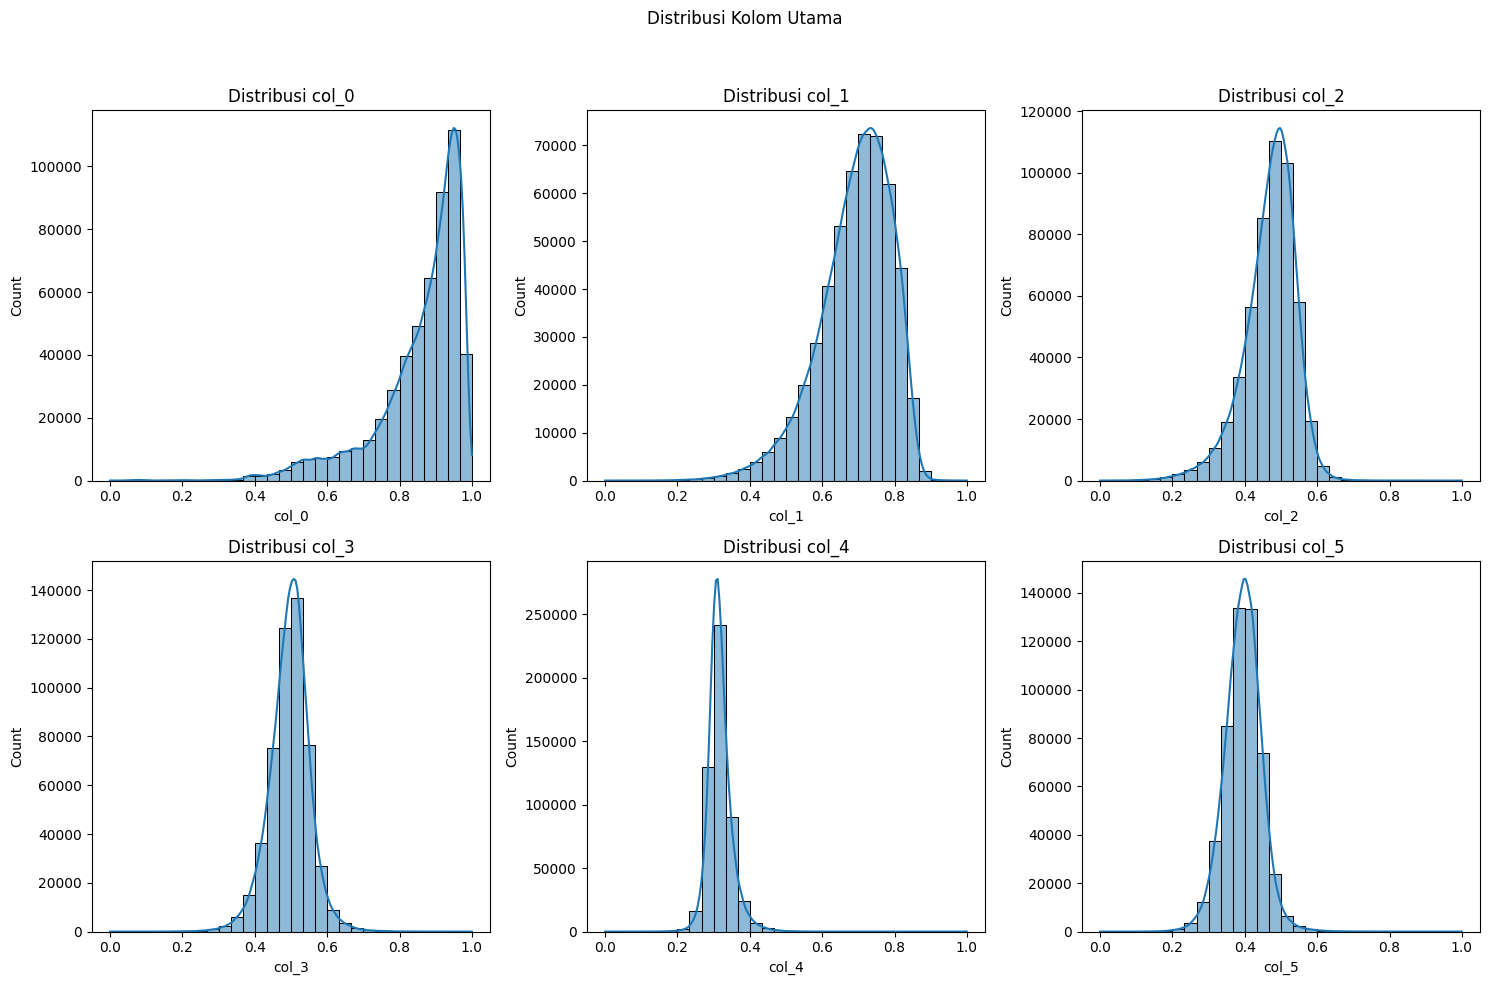

In [ ]:
# Visualisasi distribusi untuk kolom-kolom awal
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribusi Kolom Utama')

for i, col in enumerate(data.columns[:6]):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribusi {col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

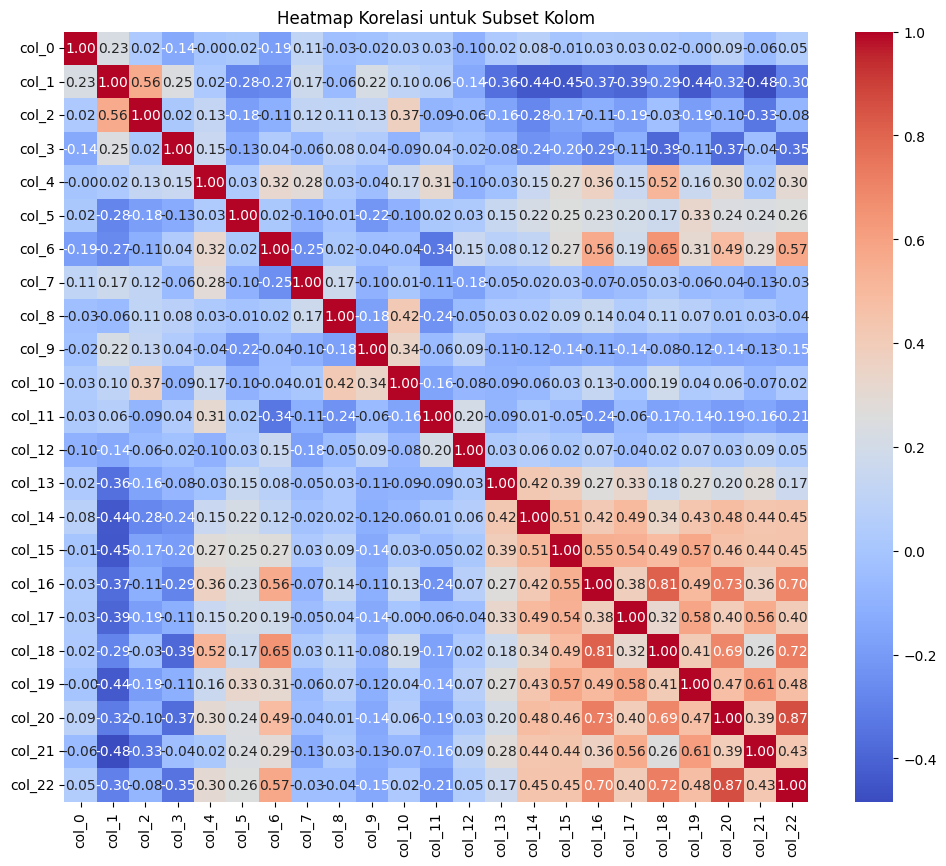

In [ ]:
# Visualisasi heatmap untuk subset kolom
subset_corr = data[data.columns[:23]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(subset_corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap Korelasi untuk Subset Kolom')
plt.show()

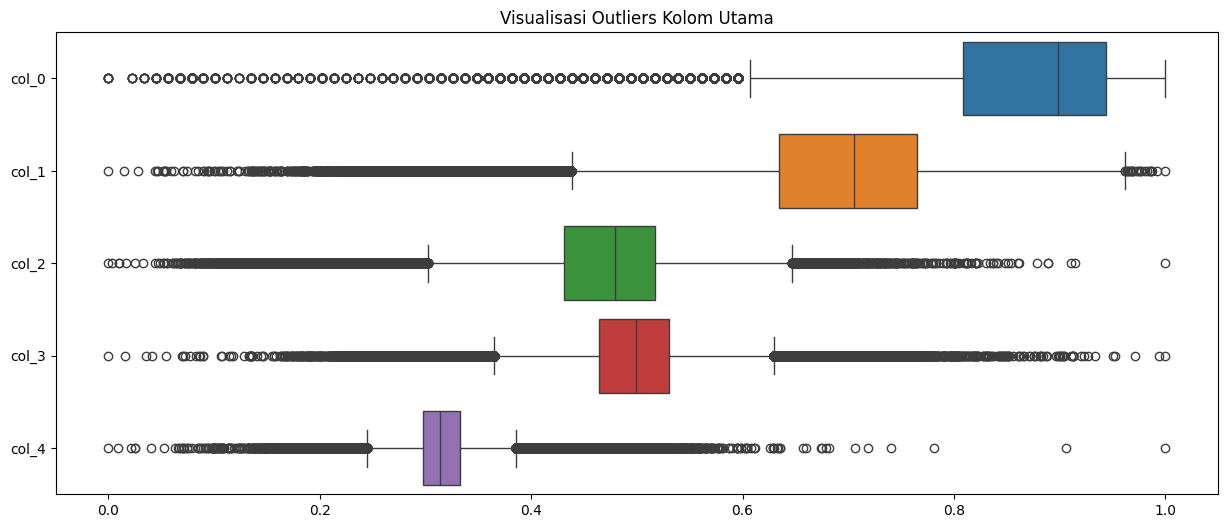

In [ ]:
# Visualisasi outliers dengan box plot
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[data.columns[:5]], orient='h')
plt.title('Visualisasi Outliers Kolom Utama')
plt.show()

In [ ]:
# Membagi data menjadi fitur (X) dan target (y) - sesuaikan nama kolom target
X = data.drop(columns='col_20')  # Ganti 'col_target' dengan nama kolom target Anda
y = data['col_20']               # Ganti 'col_target' dengan nama kolom target Anda

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Menggunakan SelectKBest untuk memilih 10 fitur terbaik berdasarkan korelasi dengan target
selector = SelectKBest(score_func=f_regression, k=20)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

# Membuat pipeline baru dengan degree yang lebih rendah
poly_pipeline_reduced = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1)),  # Mulai dengan degree=1
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Melatih model
poly_pipeline_reduced.fit(X_train_reduced, y_train)

# Evaluasi
y_pred_poly_reduced = poly_pipeline_reduced.predict(X_test_reduced)
mse_poly_reduced = mean_squared_error(y_test, y_pred_poly_reduced)
print("Mean Squared Error (Polynomial Regression with reduced features):", mse_poly_reduced)

Mean Squared Error (Polynomial Regression with reduced features): 0.00019946623509720934


In [ ]:
# Pipeline untuk Decision Tree Regression
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=20))  # Ubah max_depth sesuai kebutuhan
])

# Melatih model
tree_pipeline.fit(X_train, y_train)

# Evaluasi
y_pred_tree = tree_pipeline.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error (Decision Tree Regression):", mse_tree)

Mean Squared Error (Decision Tree Regression): 0.00023492802583929527


In [ ]:
# Pipeline untuk k-Nearest Neighbors Regression
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # Ubah n_neighbors sesuai kebutuhan
])

# Melatih model
knn_pipeline.fit(X_train, y_train)

# Evaluasi
y_pred_knn = knn_pipeline.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (k-NN Regression):", mse_knn)

Mean Squared Error (k-NN Regression): 0.0002815889710815234


In [ ]:
# Pipeline untuk k-Nearest Neighbors Regression
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # Ubah n_neighbors sesuai kebutuhan
])

# Melatih model
knn_pipeline.fit(X_train, y_train)

# Evaluasi
y_pred_knn = knn_pipeline.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (k-NN Regression):", mse_knn)

Mean Squared Error (k-NN Regression): 0.0002815889710815234


In [ ]:
# Pipeline untuk XGBoost Regression
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, objective='reg:squarederror'))
])

# Melatih model
xgb_pipeline.fit(X_train, y_train)

# Evaluasi
y_pred_xgb = xgb_pipeline.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost Regression):", mse_xgb)

Mean Squared Error (XGBoost Regression): 0.00013070718907309128


In [ ]:
print("Mean Squared Error (Polynomial Regression with reduced features):", mse_poly_reduced)
print("Mean Squared Error (Decision Tree Regression):", mse_tree)
print("Mean Squared Error (k-NN Regression):", mse_knn)
print("Mean Squared Error (XGBoost Regression):", mse_xgb)

Mean Squared Error (Polynomial Regression with reduced features): 0.00019946623509720934
Mean Squared Error (Decision Tree Regression): 0.00023492802583929527
Mean Squared Error (k-NN Regression): 0.0002815889710815234
Mean Squared Error (XGBoost Regression): 0.00013070718907309128


In [ ]:
# Import Library
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Definisikan Pipeline untuk Decision Tree
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisasi data
    ('regressor', DecisionTreeRegressor(random_state=42))  # Model Decision Tree
])

# 2. Parameter Grid untuk RandomizedSearchCV
param_grid_tree = {
    'regressor__max_depth': [5, 10, 20],         # Kedalaman maksimal pohon
    'regressor__min_samples_split': [2, 5, 10], # Minimal sampel untuk split
    'regressor__min_samples_leaf': [1, 2, 4]    # Minimal sampel di setiap leaf node
}

# 3. RandomizedSearchCV untuk Tuning Parameter
random_search_tree = RandomizedSearchCV(
    tree_pipeline,
    param_distributions=param_grid_tree,
    n_iter=5,  # Jumlah kombinasi parameter yang diuji
    scoring='neg_mean_squared_error',
    cv=3,      # 3-fold cross-validation
    random_state=42
)

# 4. Melatih RandomizedSearchCV
random_search_tree.fit(X_train, y_train)

# 5. Evaluasi Model Terbaik
best_params_tree = random_search_tree.best_params_
y_pred_tree = random_search_tree.best_estimator_.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print("Optimal Parameters:", best_params_tree)
print("Mean Squared Error (Best Decision Tree):", mse_tree)

Optimal Parameters: {'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 10}
Mean Squared Error (Best Decision Tree): 0.00019543812413113642


In [ ]:
# Parameter Grid untuk XGBoost
param_grid_xgb = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}

# RandomizedSearchCV untuk XGBoost
xgb_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_grid_xgb,
    n_iter=5,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42
)

# Melatih RandomizedSearchCV
xgb_search.fit(X_train, y_train)

# Evaluasi Model Terbaik
best_params_xgb = xgb_search.best_params_
y_pred_xgb = xgb_search.best_estimator_.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("Optimal Parameters (XGBoost):", best_params_xgb)
print("Mean Squared Error (Best XGBoost):", mse_xgb)

Optimal Parameters (XGBoost): {'regressor__n_estimators': 100, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1}
Mean Squared Error (Best XGBoost): 0.00011049265791003016


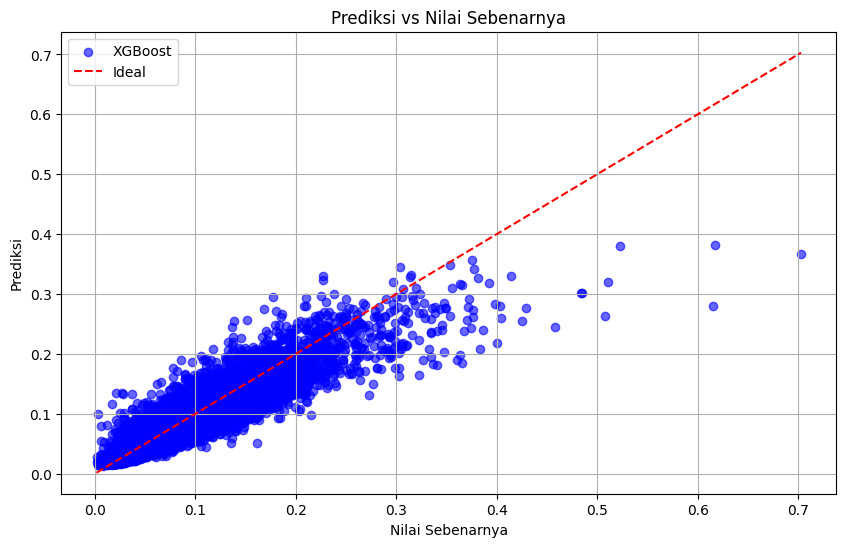

In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan data telah diolah sebelumnya
X = data.drop(columns='col_20')  # Sesuaikan nama kolom target
y = data['col_20']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan prediksi dengan model (misalnya, XGBoost)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, label='XGBoost', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.grid(True)
plt.show()

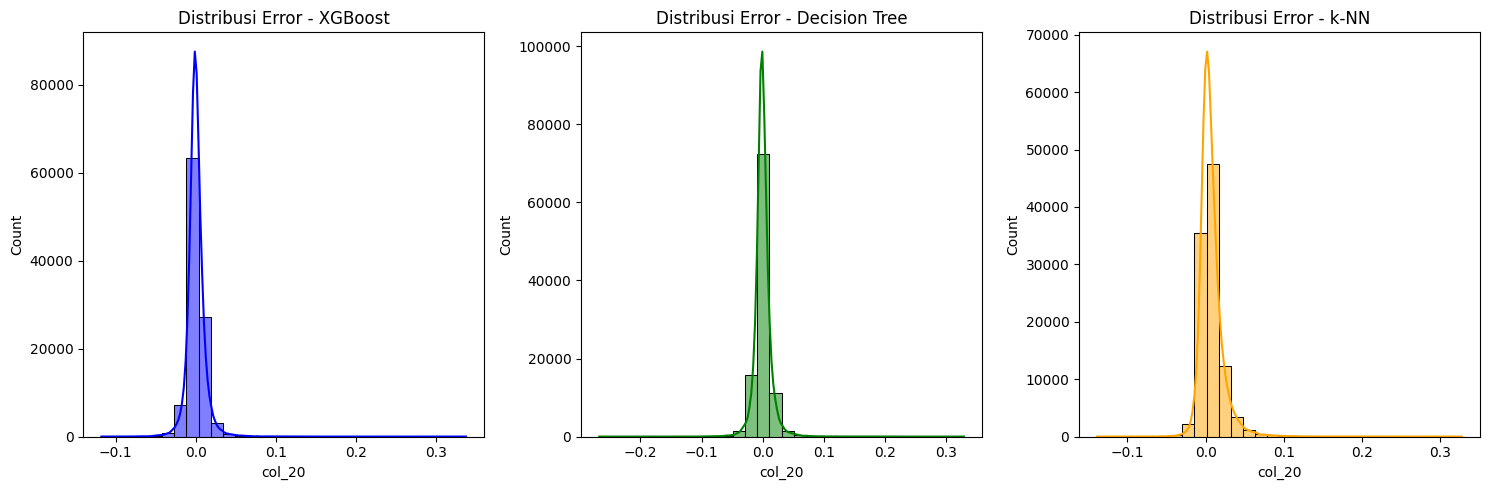

In [ ]:
errors_xgb = y_test - y_pred_xgb
errors_tree = y_test - y_pred_tree
errors_knn = y_test - y_pred_knn

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(errors_xgb, bins=30, kde=True, color='blue')
plt.title('Distribusi Error - XGBoost')

plt.subplot(1, 3, 2)
sns.histplot(errors_tree, bins=30, kde=True, color='green')
plt.title('Distribusi Error - Decision Tree')

plt.subplot(1, 3, 3)
sns.histplot(errors_knn, bins=30, kde=True, color='orange')
plt.title('Distribusi Error - k-NN')

plt.tight_layout()
plt.show()

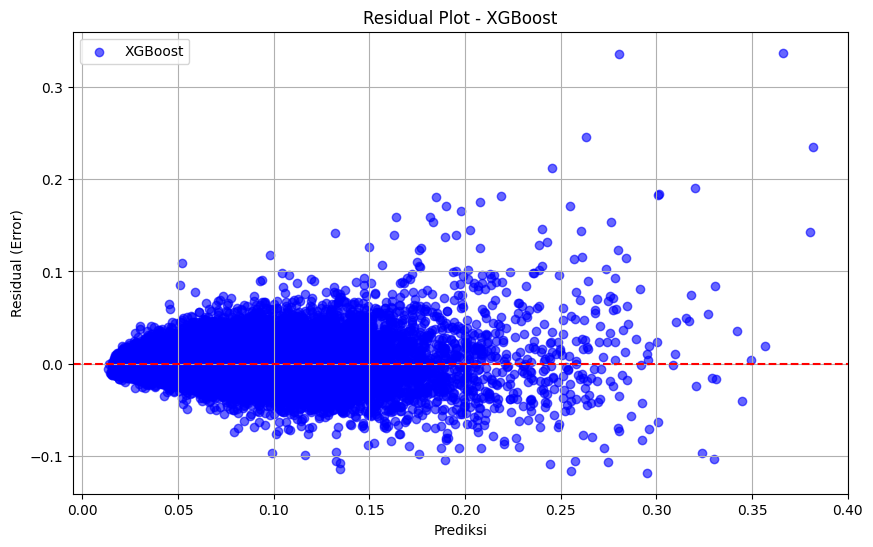

In [ ]:
residuals_xgb = errors_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.6, color='blue', label='XGBoost')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - XGBoost')
plt.xlabel('Prediksi')
plt.ylabel('Residual (Error)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-47-74fcdc77ebf8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mse_values, y=models, palette='Blues_d')


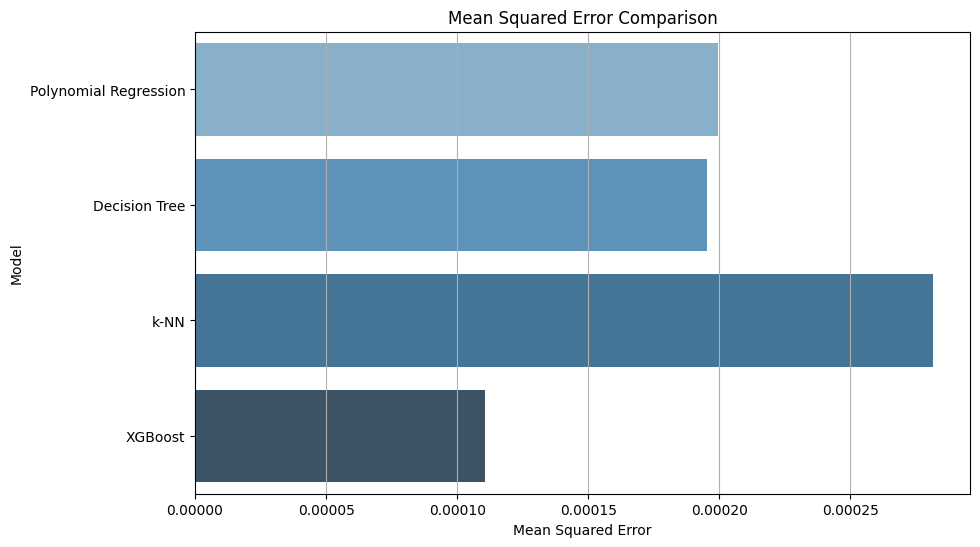

In [ ]:
mse_values = [mse_poly_reduced, mse_tree, mse_knn, mse_xgb]
models = ['Polynomial Regression', 'Decision Tree', 'k-NN', 'XGBoost']

plt.figure(figsize=(10, 6))
sns.barplot(x=mse_values, y=models, palette='Blues_d')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Mean Squared Error')
plt.ylabel('Model')
plt.grid(axis='x')
plt.show()